In [1]:

import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("evaluations.pkl", "rb") as f:
    evaluations = pickle.load(f)

In [3]:
evaluations.keys()

dict_keys(['MoRF', 'LeRF', 'Infidelity', 'AvgSensitivity', 'Complexity'])

In [4]:
aggregation = []

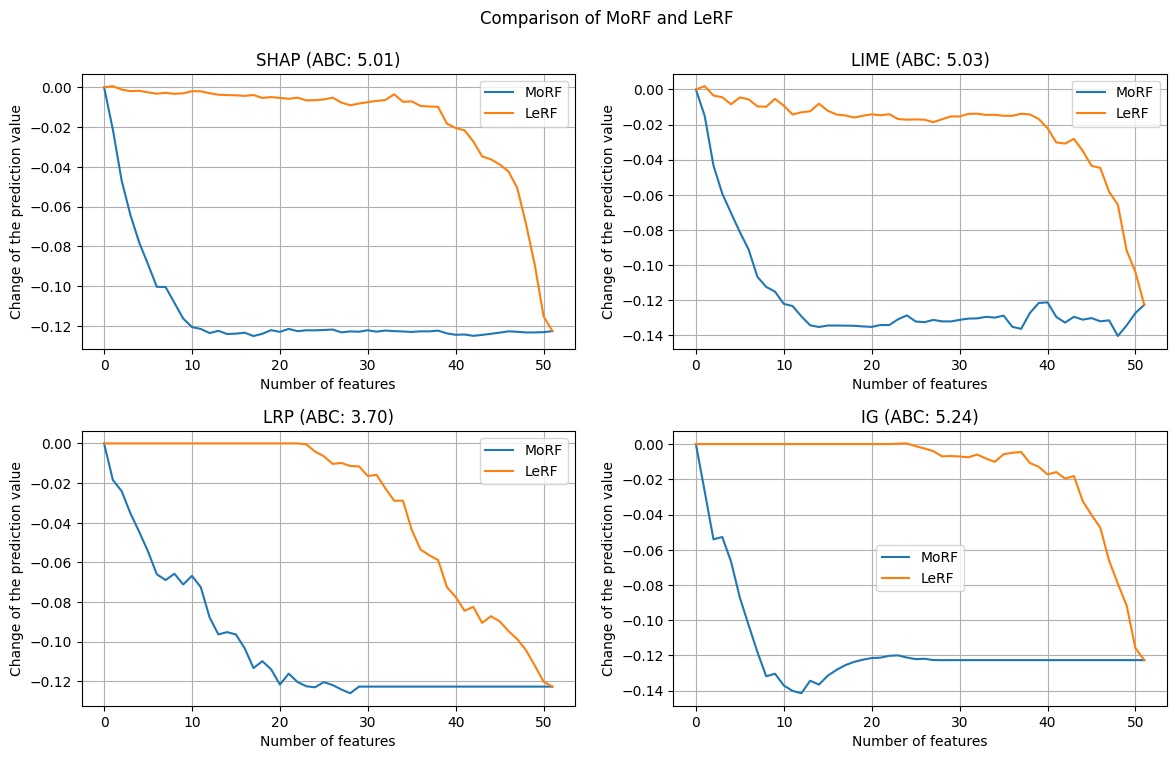

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle("Comparison of MoRF and LeRF")
plt.subplots_adjust(hspace=0.3, top=0.9)
for idx in range(len(evaluations["MoRF"])):
    i, j = idx // 2, idx % 2
    explainer = evaluations["MoRF"][idx]["explainer"]
    morf = -np.array(evaluations["MoRF"][idx]['value']).mean(axis=0)
    lerf = -np.array(evaluations["LeRF"][idx]['value']).mean(axis=0)
    morf = np.concatenate([np.array([0]), morf])
    lerf = np.concatenate([np.array([0]), lerf])
    abc = (lerf-morf).sum()
    aggregation.append({
        "explainer": explainer,
        "evaluator": "ABPC",
        "value": abc
    })
    axes[i, j].set_title(f"{explainer} (ABC: {abc:.2f})")
    axes[i, j].plot(morf, label="MoRF")
    axes[i, j].plot(lerf, label="LeRF")
    axes[i, j].set_xlabel("Number of features")
    axes[i, j].set_ylabel("Change of the prediction value")
    axes[i, j].legend()
    axes[i, j].grid()
plt.show()

In [6]:
STOP

NameError: name 'STOP' is not defined

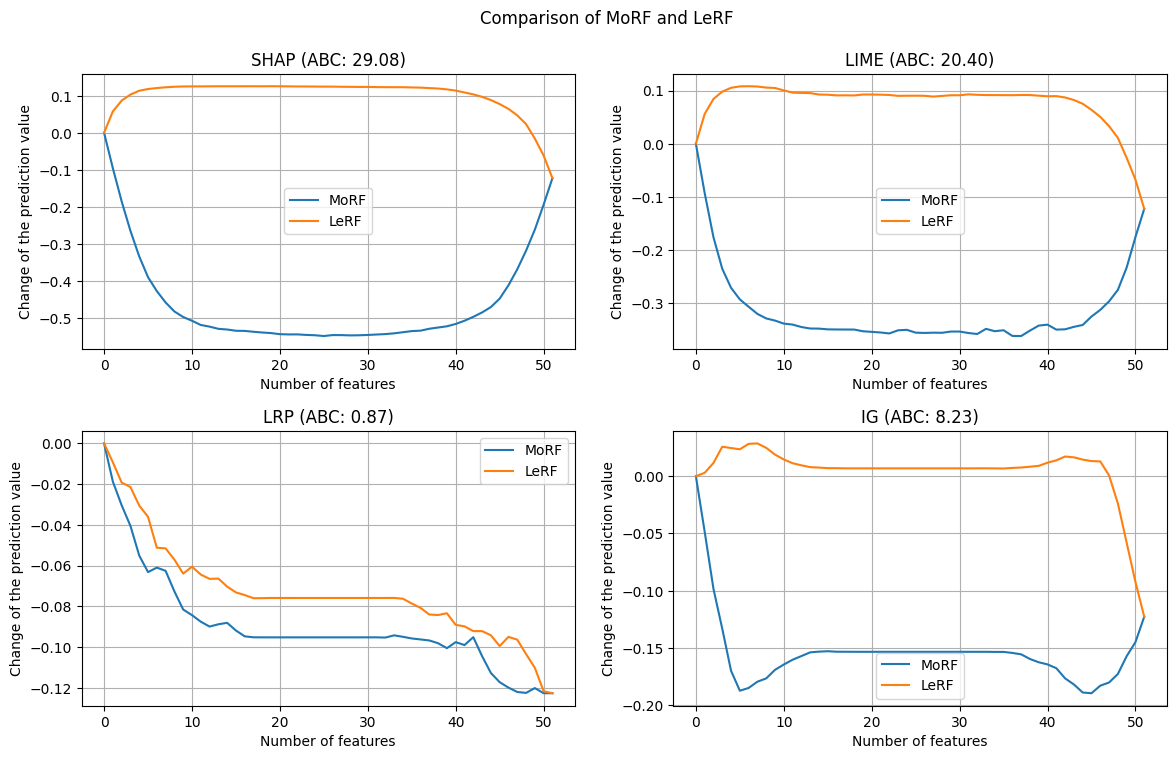

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle("Comparison of MoRF and LeRF")
plt.subplots_adjust(hspace=0.3, top=0.9)
for idx in range(len(evaluations["MoRF"])):
    i, j = idx // 2, idx % 2
    explainer = evaluations["MoRF"][idx]["explainer"]
    morf = -np.array(evaluations["MoRF"][idx]['value']).mean(axis=0)
    lerf = -np.array(evaluations["LeRF"][idx]['value']).mean(axis=0)
    morf = np.concatenate([np.array([0]), morf])
    lerf = np.concatenate([np.array([0]), lerf])
    abc = (lerf-morf).sum()
    aggregation.append({
        "explainer": explainer,
        "evaluator": "ABPC",
        "value": abc
    })
    axes[i, j].set_title(f"{explainer} (ABC: {abc:.2f})")
    axes[i, j].plot(morf, label="MoRF")
    axes[i, j].plot(lerf, label="LeRF")
    axes[i, j].set_xlabel("Number of features")
    axes[i, j].set_ylabel("Change of the prediction value")
    axes[i, j].legend()
    axes[i, j].grid()
plt.show()

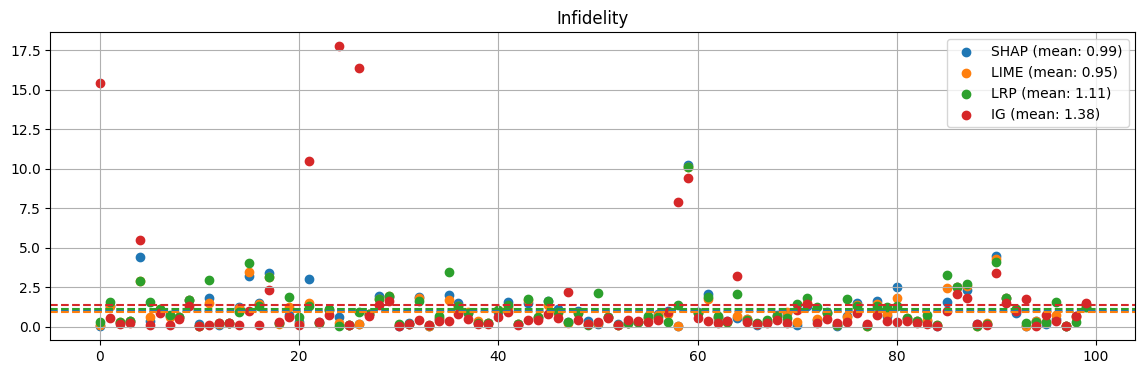

In [ ]:
plt.figure(figsize=(14, 4))
for i, obj in enumerate(evaluations['Infidelity']):
    explainer = obj['explainer']
    value = obj['value']

    mean_value = np.mean(value)
    aggregation.append({
        "explainer": explainer,
        "evaluator": "Infidelity",
        "value": mean_value
    })
    plt.scatter(range(len(value)), value, label=f"{explainer} (mean: {mean_value:.2f})", c=f"C{i}")
    plt.axhline(y=mean_value, linestyle='--', c=f"C{i}")
plt.title("Infidelity")
plt.grid()
plt.legend()
plt.show()

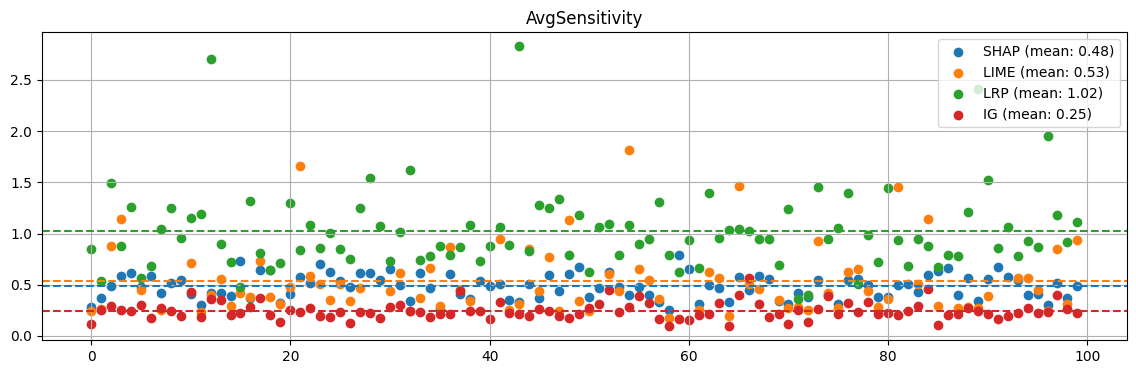

In [ ]:
plt.figure(figsize=(14, 4))
for i, obj in enumerate(evaluations['AvgSensitivity']):
    explainer = obj['explainer']
    value = obj['value']
    value = np.where(np.isinf(value), np.nan, value)
    mean_value = np.nanmean(value)

    aggregation.append({
        "explainer": explainer,
        "evaluator": "AvgSensitivity",
        "value": mean_value
    })

    plt.scatter(range(len(value)), value, label=f"{explainer} (mean: {mean_value:.2f})", c=f"C{i}")
    plt.axhline(y=mean_value, linestyle='--', c=f"C{i}")
plt.title("AvgSensitivity")
plt.grid()
plt.legend()
plt.show()

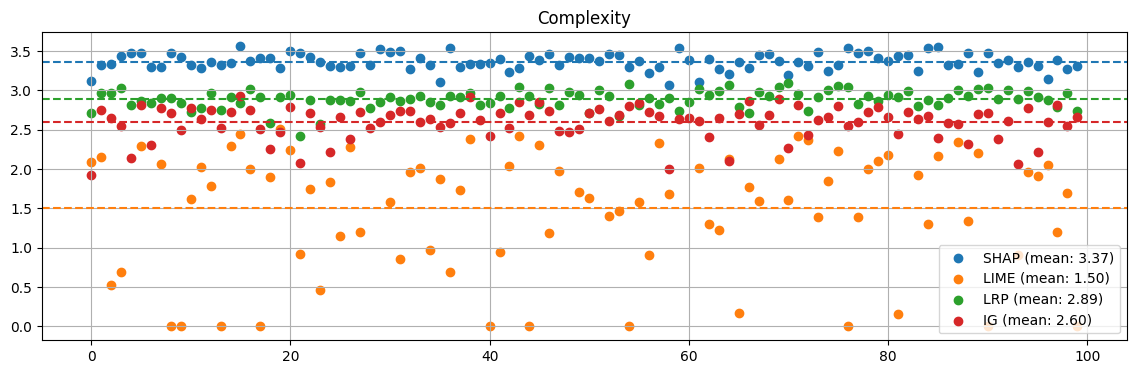

In [ ]:
plt.figure(figsize=(14, 4))
for i, obj in enumerate(evaluations['Complexity']):
    explainer = obj['explainer']
    value = obj['value']
    value = np.where(np.isinf(value), np.nan, value)
    mean_value = np.nanmean(value)

    aggregation.append({
        "explainer": explainer,
        "evaluator": "Complexity",
        "value": mean_value
    })

    plt.scatter(range(len(value)), value, label=f"{explainer} (mean: {mean_value:.2f})", c=f"C{i}")
    plt.axhline(y=mean_value, linestyle='--', c=f"C{i}")
plt.title("Complexity")
plt.grid()
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# pd.DataFrame(aggregation).to_csv("aggregation.csv", index=False)
print('ABPC : Higher the better')
print('AvgSensitivity : Lower the better')
print('Complexity : Lower the better')
print('Infidelity : Lower the better')
display(pd.DataFrame(aggregation).set_index(['explainer', 'evaluator']).unstack()['value'])

ABPC : Higher the better
AvgSensitivity : Lower the better
Complexity : Lower the better
Infidelity : Lower the better


evaluator,ABPC,AvgSensitivity,Complexity,Infidelity
explainer,,,,
IG,8.233470,0.247289,2.596456,1.383712
LIME,20.399591,0.531587,1.498521,0.948472
LRP,0.867443,1.021302,2.889101,1.106030
SHAP,29.077709,0.482587,3.365816,0.991541
